<a href="https://colab.research.google.com/github/Livi-Arbo/BME-DS-Notes/blob/main/Data_Science_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 8/30
##Data cleaning by example

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

when using pandas, only use "as" something as a known acronym, not your own abbreviations. ie: pd for pandas

mri image cloud dataset is being read in.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

In [5]:
df.head(4)


Unnamed: 0                 rawid              roi  volume  min  max  \
0           1  kirby127a_3_1_ax.img  Telencephalon_L  531111    0  374   
1           2  kirby127a_3_1_ax.img  Telencephalon_R  543404    0  300   
2           3  kirby127a_3_1_ax.img   Diencephalon_L    9683   15  295   
3           4  kirby127a_3_1_ax.img   Diencephalon_R    9678   10  335   

       mean      std  type  level  
0  128.3013  51.8593     1      1  
1  135.0683  53.6471     1      1  
2  193.5488  32.2733     1      1  
3  193.7051  32.7869     1      1

In [6]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

if one were to do df['roi'] it would only reference the doi column.

The columns rawid, unnamed, and everything but volume are removed. Then, "intra-cranial volume" (icv) is created.


.loc finds specific elements: here, df is searched for type == 1, and for level == 1. Both the searches are contained in the brackets for df.loc[......]

instead of df.type, df['type'] will ALWAYS find the variable searched for, whereas the . method can overlap with built-in commands

In [16]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
## Create a new column based on ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1

roi  volume  type  level      icv
0  Telencephalon_L  531111     1      1  1378295
1  Telencephalon_R  543404     1      1  1378295
2   Diencephalon_L    9683     1      1  1378295
3   Diencephalon_R    9678     1      1  1378295
4    Mesencephalon   10268     1      1  1378295
5    Metencephalon  159402     1      1  1378295
6   Myelencephalon    4973     1      1  1378295
7              CSF  109776     1      1  1378295

calculating the total brain volume

In [9]:
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1

roi  volume  type  level      icv      tbv
0  Telencephalon_L  531111     1      1  1378295  1268519
1  Telencephalon_R  543404     1      1  1378295  1268519
2   Diencephalon_L    9683     1      1  1378295  1268519
3   Diencephalon_R    9678     1      1  1378295  1268519
4    Mesencephalon   10268     1      1  1378295  1268519
5    Metencephalon  159402     1      1  1378295  1268519
6   Myelencephalon    4973     1      1  1378295  1268519
7              CSF  109776     1      1  1378295  1268519

comp: the percent as a decimal of the total brain volume

In [10]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

roi  volume  type  level      icv      tbv      comp
0  Telencephalon_L  531111     1      1  1378295  1268519  0.418686
1  Telencephalon_R  543404     1      1  1378295  1268519  0.428377
2   Diencephalon_L    9683     1      1  1378295  1268519  0.007633
3   Diencephalon_R    9678     1      1  1378295  1268519  0.007629
4    Mesencephalon   10268     1      1  1378295  1268519  0.008094
5    Metencephalon  159402     1      1  1378295  1268519  0.125660
6   Myelencephalon    4973     1      1  1378295  1268519  0.003920
7              CSF  109776     1      1  1378295  1268519  0.086539

the plot.bar function automatically creates the plot with pandas

<Axes: xlabel='roi'>

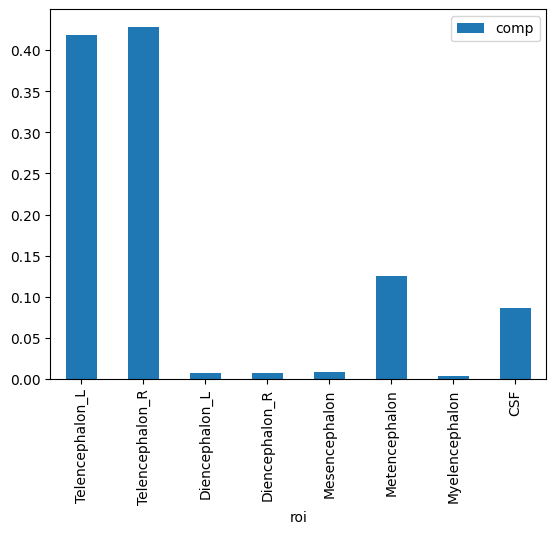

In [12]:
t1l1.plot.bar(x='roi',y='comp')
